<a href="https://colab.research.google.com/github/helen030/portfolio/blob/main/Objective_3_Genders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

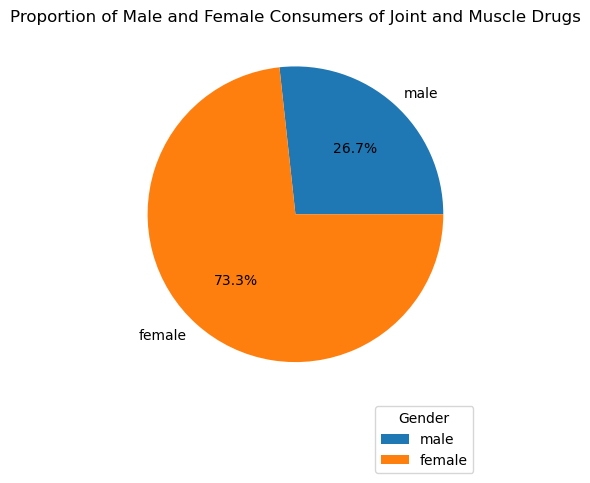

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('webmd.csv')

filtered_data = data[data['Condition'].str.contains('joint|muscle', case=False, na=False)]
pain_data = filtered_data.dropna(subset=['Sex'])

gender_counts = pain_data.groupby('Sex').size()

male_consumers = gender_counts['Male']
female_consumers = gender_counts['Female']
total_consumers = male_consumers + female_consumers

proportion_male = male_consumers / total_consumers
proportion_female = female_consumers / total_consumers
proportions = [proportion_male, proportion_female]
labels = ["male", "female"]

plt.pie(proportions, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender', bbox_to_anchor=(1,0), loc='upper right')
plt.title('Proportion of Male and Female Consumers of Joint and Muscle Drugs')

plt.show()

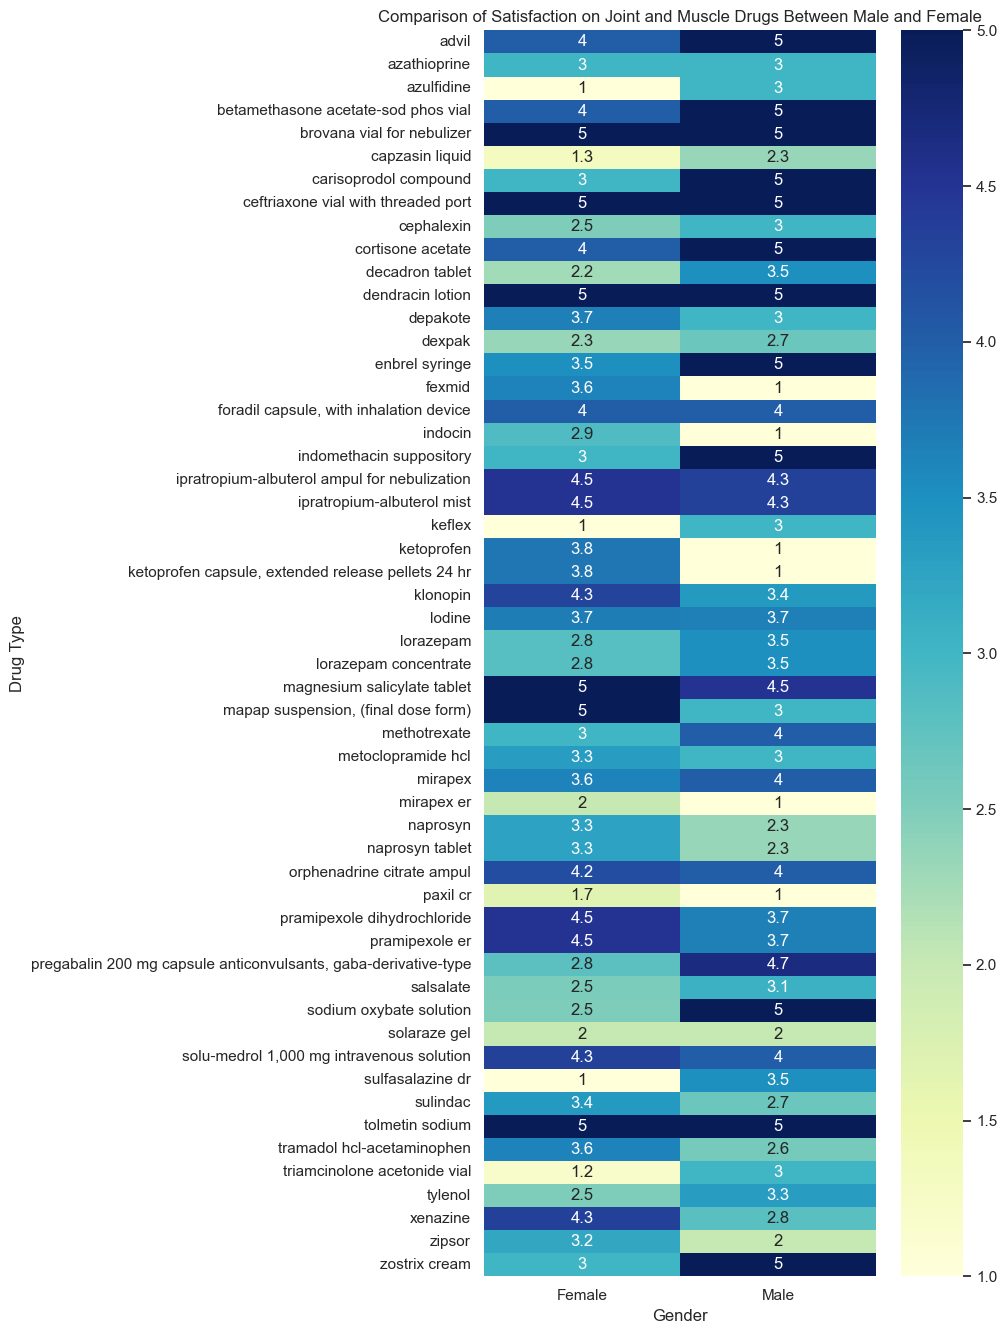

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# only consider pain for joint and muscle conditions
def pain_conditions(df):
    filtered_df = df[df['Condition'].str.contains('joint|muscle', case=False)]
    return filtered_df

# drop null values in sex and satisfaction
def drop_null_values(df):
    cleaned_df = df.dropna(subset=['Sex', 'Satisfaction'])
    return cleaned_df

# only consider pain drug with satisfaction values for both male and female
def pain_drugs(df):
    grouped_df = df.groupby('Drug')
    pain_drugs = []
    for name, group in grouped_df:
        if set(group['Sex']) == {'Male', 'Female'} and len(group) > 1:
            pain_drugs.append(name)
    filtered_df = df[df['Drug'].isin(pain_drugs)]
    return filtered_df

def create_heatmap(df):
    pivot_df = df.pivot_table(index='Drug', columns='Sex', values='Satisfaction')

    font_size = 10
    figure_height = len(pivot_df) * (font_size / 40)
    sns.set(font_scale=font_size / 10)
    plt.figure(figsize=(10, figure_height))

    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
    plt.title('Comparison of Satisfaction on Joint and Muscle Drugs Between Male and Female')
    plt.xlabel('Gender')
    plt.ylabel('Drug Type')
    plt.tight_layout()
    plt.show()


df = pd.read_csv('webmd.csv')
df = pain_conditions(df)
df = drop_null_values(df)
df = pain_drugs(df)
create_heatmap(df)